In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from qiskit.visualization import plot_gate_map, plot_coupling_map
from qiskit.transpiler.coupling import CouplingMap

from ghzstate import GHZState
from graphstate import GraphState
from qubit_coords import qubit_coords5l, qubit_coords5, qubit_coords7, qubit_coords16, qubit_coords27, qubit_coords127

In [2]:
from utilities import startup
provider = startup(check=False)

Account enabled
Provider: ibm-q-melbourne


In [3]:
def calc_d(n):
    return 0.5*(np.sqrt(8*(n) - 7) - 1)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

## Architecture Diagrams

In [4]:
import matplotlib.pyplot as plt

## GHZ Records

In [5]:
# atoms
X0 = [2000, 2019]
Y0 = [3, 20]

# ions
X1 = [2000, 2005, 2010, 2021]
Y1 = [4, 6, 14, 24]

# mof photons
X2 = [2010, 2018]
Y2 = [10, 18]

# pol photons
X3 = [1999, 2001, 2004, 2006, 2011, 2016, 2018, 2022]
Y3 = [3, 4, 5, 6, 8, 10, 12, 14]

# superconducting
X4 = [2010, 2013, 2017, 2018, 2019, 2021, 2022, 2022.5]
Y4 = [3, 5, 10, 12, 18, 27, 29, 32]

# silicon
X5 = [2021]
Y5 = [3]

# NV
X6 = [2008, 2019]
Y6 = [3, 7]

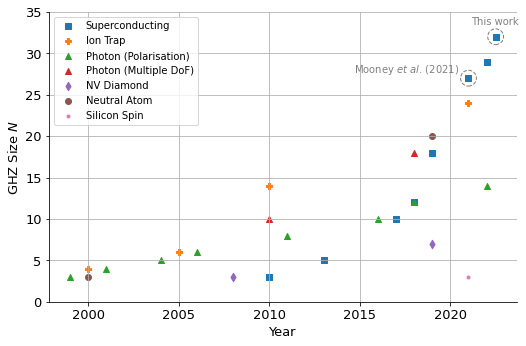

In [6]:
plt.rc('font', size=13)
plt.rc('legend', fontsize=10)
fig, ax = plt.subplots(figsize=(7.5, 5))

ax.scatter(X4, Y4, marker='s', label='Superconducting')
ax.scatter(X1, Y1, marker='P', label='Ion Trap')
ax.scatter(X3, Y3, marker='^', label='Photon (Polarisation)')
ax.scatter(X2, Y2, marker='^', label='Photon (Multiple DoF)')
ax.scatter(X6, Y6, marker='d', label='NV Diamond')
ax.scatter(X0, Y0, marker='o', label='Neutral Atom')
ax.scatter(X5, Y5, marker='.', label='Silicon Spin')
ax.scatter(X4[-1], Y4[-1], s=250, facecolors='none', edgecolors='grey', linestyle='--')
ax.scatter(X4[-3], Y4[-3], s=250, facecolors='none', edgecolors='grey', linestyle='--')

ax.set_ylim(0, 35)

ax.legend()
ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.annotate('This work', (2021.15, 33.5), color='grey', size=10)
ax.annotate('Mooney $\it{et}$ $\it{al}$. (2021)', (2014.7, 27.7), color='grey', size=10)

ax.set_xlabel('Year')
ax.set_ylabel('GHZ Size $\it{N}$')

fig.set_tight_layout(True)
fig.savefig('diagrams/ghzrecord', dpi=300)

## Bell States

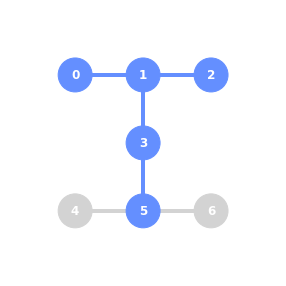

In [32]:
backend = provider.get_backend('ibm_perth')

qubit_color = ['#648fff']*7
qubit_color[4] = '#D3D3D3'
qubit_color[6] = '#D3D3D3'

line_color = ['#648fff']*14
line_color[7] = '#D3D3D3'
line_color[9] = '#D3D3D3'
line_color[10] = '#D3D3D3'
line_color[11] = '#D3D3D3'

fig = plot_gate_map(backend, qubit_color=qubit_color, line_color=line_color)
fig.savefig('diagrams/7qmapT', dpi=300, pad_inches=0)
fig

## Graphstate Depth Maps

In [58]:
color_list = ['tab:red', 'tab:green', 'tab:blue']

#### 5-qubit Depth Map

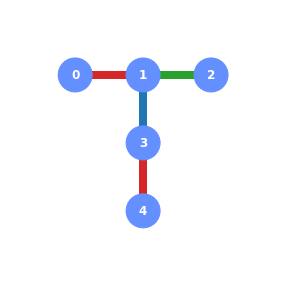

In [140]:
backend = provider.get_backend('ibmq_quito')
gs = GraphState(backend)

depths = gs.gen_graphstate_circuit(return_depths=True)
coupling_map = []
line_color = [] 
for i, depth in enumerate(depths):
    coupling_map.extend(depth)
    line_color.extend([color_list[i]] * len(depth))
config = backend.configuration()
nqubits = config.n_qubits

fig = plot_coupling_map(nqubits, qubit_coords5, coupling_map, line_color=line_color, line_width=8, figsize=(5, 5))
fig.savefig('diagrams/dmap5', dpi=300)
fig

#### 7-qubit Depth Map

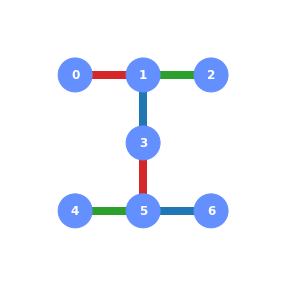

In [141]:
backend = provider.get_backend('ibm_perth')
gs = GraphState(backend)

depths = gs.gen_graphstate_circuit(return_depths=True)
coupling_map = []
line_color = [] 
for i, depth in enumerate(depths):
    coupling_map.extend(depth)
    line_color.extend([color_list[i]] * len(depth))
config = backend.configuration()
nqubits = config.n_qubits

fig = plot_coupling_map(nqubits, qubit_coords7, coupling_map, line_color=line_color, line_width=8, figsize=(5, 5))
fig.savefig('diagrams/dmap7', dpi=300)
fig

#### 16-qubit Depth Map

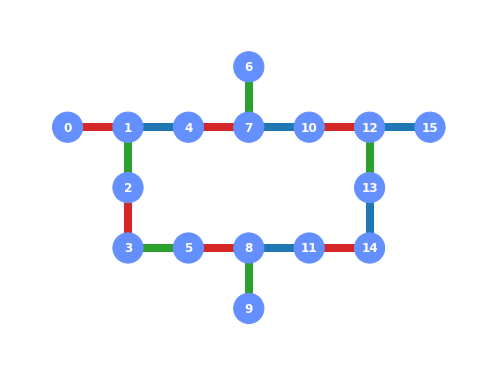

In [142]:
backend = provider.get_backend('ibmq_guadalupe')
gs = GraphState(backend)

depths = gs.gen_graphstate_circuit(return_depths=True)
coupling_map = []
line_color = [] 
for i, depth in enumerate(depths):
    coupling_map.extend(depth)
    line_color.extend([color_list[i]] * len(depth))
config = backend.configuration()
nqubits = config.n_qubits

fig = plot_coupling_map(nqubits, qubit_coords16, coupling_map, line_color=line_color, line_width=8, figsize=(4*7/3, 4*5/3))
fig.savefig('diagrams/dmap16', dpi=300)
fig

#### 65-qubit Depth Map

In [8]:
#backend = provider.get_backend('ibm_ithaca')
gs = GraphState(backend)

depths = gs.gen_graphstate_circuit(return_depths=True)
coupling_map = []
line_color = [] 
for i, depth in enumerate(depths):
    coupling_map.extend(depth)
    line_color.extend([color_list[i]] * len(depth))
config = backend.configuration()
nqubits = config.n_qubits

fig = plot_coupling_map(nqubits, qubit_coords65, coupling_map, line_color=line_color, line_width=8, figsize=(4*7/3, 4*5/3))
fig.savefig('diagrams/dmap65', dpi=300)
fig

NameError: name 'color_list' is not defined

#### 27-qubit Depth Map

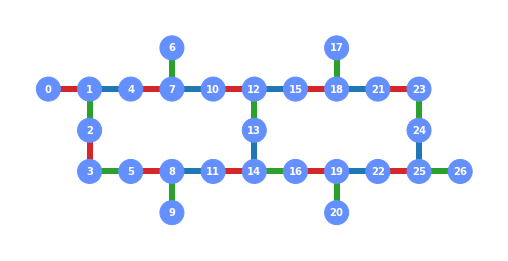

In [157]:
backend = provider.get_backend('ibmq_toronto')
gs = GraphState(backend)

depths = gs.gen_graphstate_circuit(return_depths=True)
coupling_map = []
line_color = [] 
for i, depth in enumerate(depths):
    coupling_map.extend(depth)
    line_color.extend([color_list[i]] * len(depth))
config = backend.configuration()
nqubits = config.n_qubits

fig = plot_coupling_map(27, qubit_coords27, coupling_map, line_color=line_color, line_width=6, figsize=(3*11/3.3, 3*5/3.3))
fig.savefig('diagrams/dmap27', dpi=300)
fig

#### 127-qubit Depth Map

In [7]:
backend = provider.get_backend('ibm_washington')
gs = GraphState(backend)

depths = gs.gen_graphstate_circuit(return_depths=True)
coupling_map = []
line_color = [] 
for i, depth in enumerate(depths):
    coupling_map.extend(depth)
    line_color.extend([color_list[i]] * len(depth))
config = backend.configuration()
nqubits = config.n_qubits

fig = plot_coupling_map(nqubits, qubit_coords127, coupling_map, qubit_color=['#648fff']*nqubits, line_color=line_color, line_width=6, figsize=(12,12))
fig.savefig('diagrams/dmap127', dpi=400)
fig

NameError: name 'color_list' is not defined

#### Matrix

In [125]:
from utilities import bit_str_list
plt.rc('font', size=13)

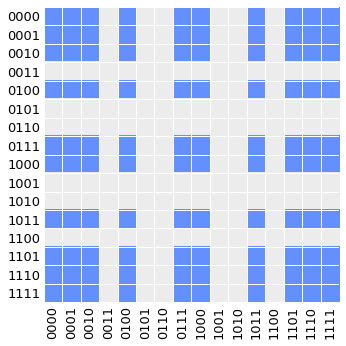

In [128]:
labels = bit_str_list(4)
x = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1]
Z = np.outer(x, x)

fig, ax = plt.subplots(figsize=(5, 5))

cmap = colors.ListedColormap(['#ECECEC', '#648fff'])
ax.imshow(Z, cmap)
ax.set_xticks(np.arange(0, 16), labels=labels, rotation=90)
ax.set_yticks(np.arange(0, 16), labels=labels)
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_xticks(np.arange(-.5, 16, 1), minor=True)
ax.set_yticks(np.arange(-.5, 16, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.set_tight_layout(True)
fig.savefig('diagrams/Afull', dpi=300)

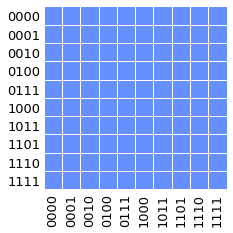

In [129]:
labels = ['0000', '0001', '0010', '0100', '0111', '1000', '1011', '1101', '1110', '1111']
xred = [1] * 10
Zred = np.outer(xred, xred)

fig, ax = plt.subplots(figsize=(5*11/16, 5*11/16))

cmap = colors.ListedColormap(['#648fff'])
ax.imshow(Zred, cmap)
ax.set_xticks(np.arange(0, 10), labels=labels, rotation=90)
ax.set_yticks(np.arange(0, 10), labels=labels)
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.set_tight_layout(True)
fig.savefig('diagrams/Areduced', dpi=300)

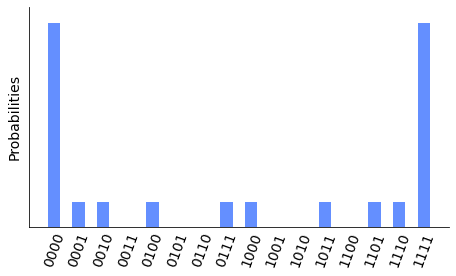

In [139]:
from qiskit.visualization import plot_histogram
plt.rc('font', size=12)

fig, ax = plt.subplots(figsize=(6.5, 4))

labels = bit_str_list(4)
x = [8, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 8]
counts = {labels[i]: x[i] for i in range(len(labels))}

plot_histogram(counts, color='#648fff', bar_labels=False, ax=ax)
ax.set_ylim(0, 0.36)
ax.yaxis.set_ticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_tight_layout(True)
fig.savefig('diagrams/ghznoisy', dpi=300)

## Depth Plot

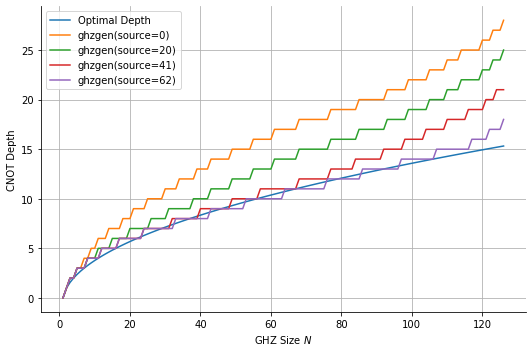

In [7]:
backend = provider.get_backend('ibm_washington')
ghz = GHZState(backend)
source = 62

fig, ax = plt.subplots(figsize=(7.5, 5))

n = len(backend.properties().qubits)
X = [i for i in range(1, n)]
Y0 = [calc_d(i) for i in range(1, n)]
Y1 = [ghz.gen_circ_instr(i, 0)[2] for i in range(1, n)]
Y2 = [ghz.gen_circ_instr(i, 20)[2] for i in range(1, n)]
Y3 = [ghz.gen_circ_instr(i, 41)[2] for i in range(1, n)]
Y4 = [ghz.gen_circ_instr(i, source)[2] for i in range(1, n)]


ax.plot(X, Y0, label='Optimal Depth')
ax.plot(X, Y1, label='ghzgen(source=0)')
ax.plot(X, Y2, label=f'ghzgen(source=20)')
ax.plot(X, Y3, label=f'ghzgen(source=41)')
ax.plot(X, Y4, label=f'ghzgen(source={source})')

ax.set_xlabel('GHZ Size $\it{N}$')
ax.set_ylabel('CNOT Depth')
ax.grid()
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_tight_layout(True)

fig.savefig('output/ghzdepthplot', dpi=300)

## Washington Embedding

In [25]:
backend = provider.get_backend('ibm_washington')

cmap = mpl.cm.get_cmap('viridis_r')
#cmap = truncate_colormap(cmap, minval=0, maxval=0.9, n=cmap.N)
#cmap = sns.color_palette('Spectral_r', as_cmap=True)
#cmap = mpl.cm.get_cmap('spring_r')


ghz = GHZState(backend)
nqubits = 50
source = 63
qubits, edges, depths = ghz.gen_circ_instr(nqubits, source, return_map=True)
 

config = backend.configuration()
num_qubits = config.n_qubits
coupling_map = CouplingMap(config.coupling_map)
name = backend.name()
coupling_list = list(coupling_map.get_edges())

for edge in edges:
    coupling_list.remove(tuple(edge))
    coupling_list.remove(tuple(edge[::-1]))
edges = [tuple(edge) for edge in edges]
   
qubit_color=['#D3D3D3']*num_qubits
line_color = ['#D3D3D3']*len(coupling_list)

for i, q in enumerate(qubits):
    max_depth = max(depths)
    norm_depths = [d/max_depth for d in depths]
    qubit_color[q] = mpl.colors.to_hex(cmap(norm_depths[i]), keep_alpha=True)
    #qubit_color[q] = '#0000FF'
qubit_color[source] = mpl.colors.to_hex(cmap(0), keep_alpha=True)
    
for i, edge in enumerate(edges):
    coupling_list.append(edge)
    line_color.append(mpl.colors.to_hex(cmap(norm_depths[i]), keep_alpha=True))

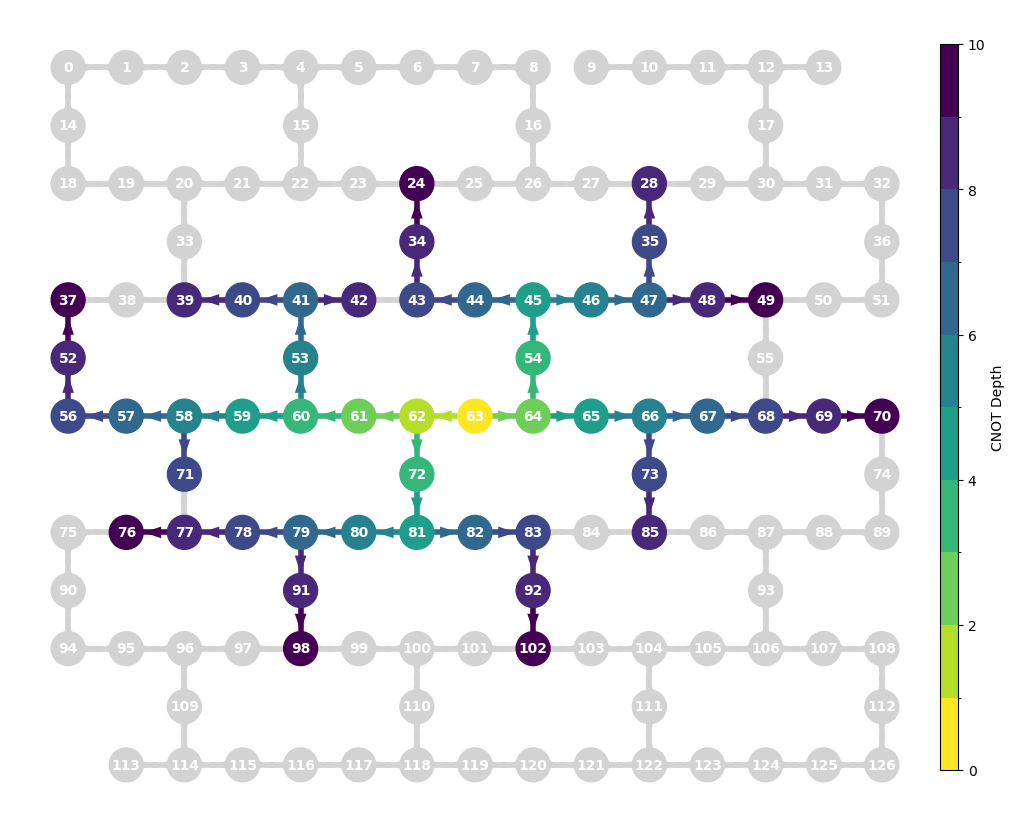

In [26]:
fig = plot_coupling_map(num_qubits, qubit_coords127, coupling_list, plot_directed=True, 
                        qubit_color=qubit_color, line_color=line_color, font_color=('white'),
                        figsize=(12,12))

bounds = list(range(max(depths) + 2))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax = fig.get_axes()[0]
#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='2%', pad=0.2)
cax = fig.add_axes([0.9, 0.2, 0.015, 0.605])
#cax = fig.add_axes([0.159, 0.155, 0.705, 0.015])

im = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical', label='CNOT Depth')

fig.savefig('diagrams/ghzembedding.png', dpi=400)
fig

In [10]:
cmap = mpl.cm.get_cmap('viridis_r')
cmap = truncate_colormap(cmap, minval=0, maxval=0.9, n=cmap.N)
#cmap = sns.color_palette('Spectral_r', as_cmap=True)
#cmap = mpl.cm.get_cmap('spring_r')


ghz = GHZState(backend)
nqubits = 32
source = 73
qubits, edges, depths = ghz.gen_circ_instr(nqubits, source, mapped=True)
 

config = backend.configuration()
num_qubits = config.n_qubits
coupling_map = CouplingMap(config.coupling_map)
name = backend.name()
coupling_list = list(coupling_map.get_edges())

for edge in edges:
    coupling_list.remove(tuple(edge))
    coupling_list.remove(tuple(edge[::-1]))
edges = [tuple(edge) for edge in edges]
   
qubit_color=['#D3D3D3']*num_qubits
line_color = ['#D3D3D3']*len(coupling_list)

for i, q in enumerate(qubits):
    max_depth = max(depths)
    norm_depths = [d/max_depth for d in depths]
    qubit_color[q] = mpl.colors.to_hex(cmap(norm_depths[i]), keep_alpha=True)
    #qubit_color[q] = '#0000FF'
qubit_color[source] = mpl.colors.to_hex(cmap(0), keep_alpha=True)
    
for i, edge in enumerate(edges):
    coupling_list.append(edge)
    line_color.append(mpl.colors.to_hex(cmap(norm_depths[i]), keep_alpha=True))

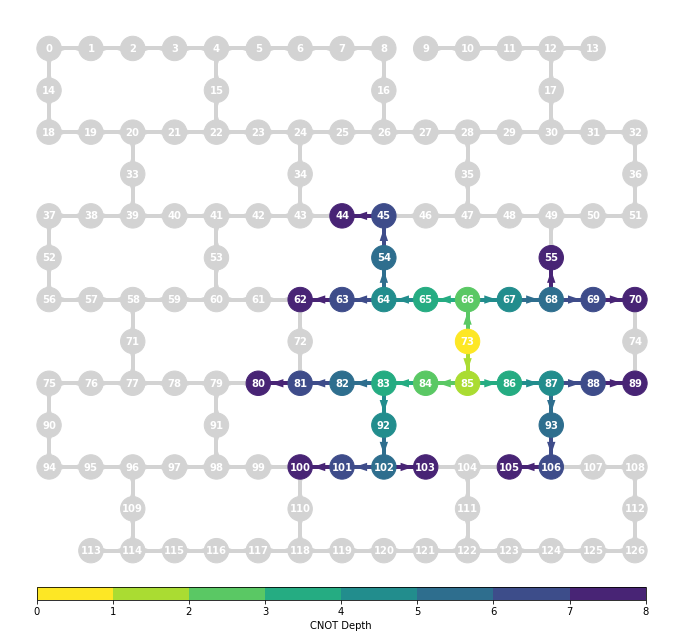

In [11]:
fig = plot_coupling_map(num_qubits, qubit_coords127, coupling_list, plot_directed=True, 
                        qubit_color=qubit_color, line_color=line_color, font_color=('white'),
                        figsize=(12,12))

bounds = list(range(max(depths) + 2))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax = fig.get_axes()[0]
#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='2%', pad=0.2)
#cax = fig.add_axes([0.9, 0.2, 0.015, 0.605])
cax = fig.add_axes([0.159, 0.155, 0.705, 0.015])

im = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cb = fig.colorbar(im, cax=cax, orientation='horizontal', label='CNOT Depth')

fig.savefig('diagrams/ghzembedding32.png', dpi=400)
fig

In [74]:
#def qnumber(i):
#    return 

row_list = []
row_list.append(list(range(0, 31)))
for i in range(1, 13):
    start = row_list[i-1][-1] + 9
    row_list.append(list(range(start, start + 31)))
    
edges = []
for row in row_list:
    for i in range(len(row)-1):
        edges.append((row[i], row[i+1]))

for i, row in enumerate(row_list[:-1]):
    print(row)
    mid = list(range(row[-1] + 1, row[-1] + 9))
    print(mid)
    if i % 2 == 0:
        above = row[0::4]
    else:
        above = row[0+2::4]
    print(above)
    for j, n in enumerate(mid):
        edges.append((above[j], n))
        edges.append((n, above[j] + 39))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[31, 32, 33, 34, 35, 36, 37, 38]
[0, 4, 8, 12, 16, 20, 24, 28]
[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
[70, 71, 72, 73, 74, 75, 76, 77]
[41, 45, 49, 53, 57, 61, 65, 69]
[78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[109, 110, 111, 112, 113, 114, 115, 116]
[78, 82, 86, 90, 94, 98, 102, 106]
[117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]
[148, 149, 150, 151, 152, 153, 154, 155]
[119, 123, 127, 131, 135, 139, 143, 147]
[156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]
[187, 188, 189, 190, 191, 1

In [94]:
import networkx as nx
from qiskit import QuantumCircuit
import numpy as np


In [95]:
G = nx.Graph()
G.add_edges_from(edges)

In [113]:
nqubits = len(G.nodes)
circ = QuantumCircuit(nqubits)

unconnected_edges = edges.copy()
depths = []
# Apply Hadamard gates to every qubit
circ.h(list(range(nqubits)))

while unconnected_edges:
    i = 0
    connected_qubits = []  # Qubits already connected in the current time step
    connected_edges = []
    remove = []
    if i == 0:
        for edge in unconnected_edges:
            if G.degree(edge[0]) == 3 or G.degree(edge[1]) == 3:
                if np.any(np.isin(edge, connected_qubits)) == False:
                    circ.cz(edge[0], edge[1])
                    connected_qubits.extend(edge)
                    remove.append(edge)
      
    for edge in unconnected_edges:
        if np.any(np.isin(edge, connected_qubits)) == False:
            circ.cz(edge[0], edge[1])
            connected_qubits.extend(edge)
            remove.append(edge)
    # Remove connected edges from unconnected edges list
    depths.append(remove)
    for edge in remove:
        unconnected_edges.remove(edge)
    i += 1

In [136]:
#for row in row_list:
#    print(row)
#depths[2]

In [144]:
batches = {}
group_list = []

unbatched_edges = edges.copy()
i = 0
# Loop over unbatched edges until no unbatched edges remain
while unbatched_edges:
    batches[f'batch{i}'] = []
    batched_qubits = []
    remove = []

    for edge in unbatched_edges:
        group = tuple(list(edge) + list(G.neighbors(edge[0])) + list(G.neighbors(edge[1])))
        # Append edge to batch only if target and adjacent qubits have
        # not been batched in the current cycle
        if np.any(np.isin(group, batched_qubits)) == False:
            batches[f'batch{i}'].append(group)
            group_list.append(group)

            batched_qubits.extend(group)
            remove.append(edge)

    for edge in remove:
        unbatched_edges.remove(edge)
    i += 1

In [159]:
batches.keys()

dict_keys(['batch0', 'batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6'])

In [160]:
len(G.nodes)

499